<a href="https://colab.research.google.com/github/narc-kany/Stochastic-RSI-on-Apple-Stocks/blob/main/Stochastic_RSI_on_Apple_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Stochastic Relative strength index(RSI) And Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load apple stock
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date, Close, Volume, Open, High, Low\r\n2/28/2020,273.36,106721200.00,257.26,278.41,256.37\r\n2/27/2020,273.52,80151380.00,281.10,286.00,272.96\r\n2/26/2020,292.65,49678430.00,286.53,297.88,286.50\r\n2/25/2020,288.08,57668360.00,300.95,302.53,286.13\r\n2/24/2020,298.18,55548830.00,297.26,304.18,289.23\r\n2/21/2020,313.05,32426420.00,318.62,320.45,310.50\r\n2/20/2020,320.30,25141490.00,322.63,324.65,318.21\r\n2/19/2020,323.62,23495990.00,320.00,324.57,320.00\r\n2/18/2020,319.00,38190550.00,315.36,319.75,314.61\r\n2/14/2020,324.95,20028450.00,324.74,325.98,322.85\r\n2/13/2020,324.87,23686890.00,324.19,326.22,323.35\r\n2/12/2020,327.20,28432570.00,321.47,327.22,321.47\r\n2/11/2020,319.61,23580780.00,323.60,323.90,318.71\r\n2/10/2020,321.55,27337220.00,314.18,321.55,313.85\r\n2/7/2020,320.03,29421010.00,322.37,323.40,318.00\r\n2/6/2020,325.21,26356390.00,322.57,325.22,320.26\r\n2/5/2020,321.45,29706720.00,323.52,324.76,318.95\r\n2/4/2020,318.85,34154130.00,315.31,319.64,313.

In [6]:
# Remove space from the header(column heading)
df = pd.read_csv('AAPL.csv',  delimiter=',', header=None, skiprows=1, names=['Date','Close','Volume','Open','High','Low'])
# print the read data
df

,Date,Close,Volume,Open,High,Low
0,2/28/2020,273.36,106721200.0,257.26,278.41,256.37
1,2/27/2020,273.52,80151380.0,281.10,286.00,272.96
2,2/26/2020,292.65,49678430.0,286.53,297.88,286.50
3,2/25/2020,288.08,57668360.0,300.95,302.53,286.13
4,2/24/2020,298.18,55548830.0,297.26,304.18,289.23
...,...,...,...,...,...,...
2513,3/5/2010,31.28,224647427.0,30.71,31.39,30.66
2514,3/4/2010,30.10,89591907.0,29.90,30.13,29.80
2515,3/3/2010,29.90,92846488.0,29.85,29.98,29.71
2516,3/2/2010,29.84,141486282.0,29.99,30.12,29.68


In [7]:
# check the datatypes 
df.dtypes

Date       object
Close     float64
Volume    float64
Open      float64
High      float64
Low       float64
dtype: object

In [8]:
# set date as the new index 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [9]:
# check the new size of the dataset
df.shape

(2518, 6)

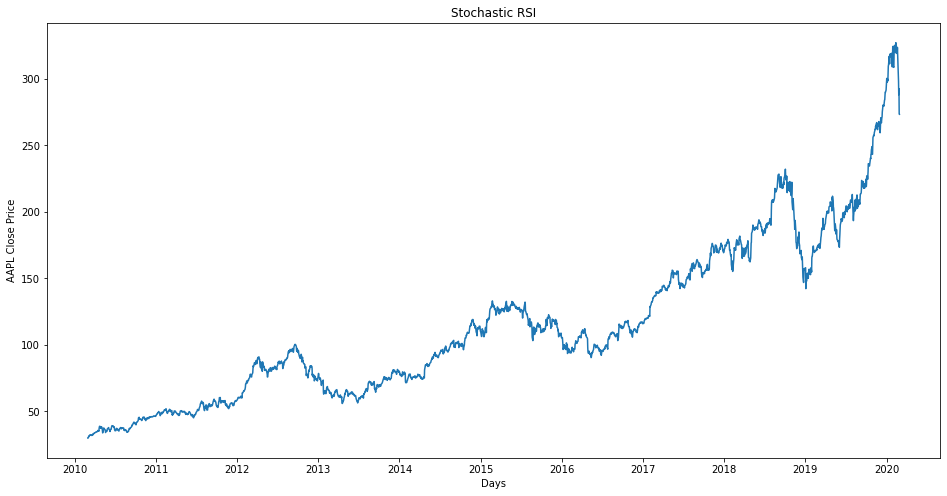

In [10]:
# Lets describe this in a plot
plt.figure(figsize = (16, 8))
plt.title('Stochastic RSI')
plt.xlabel('Days')
plt.ylabel('AAPL Close Price')
plt.plot(df['Close'])
plt.show()

In [11]:
df

,Date,Close,Volume,Open,High,Low
2020-02-28,2/28/2020,273.36,106721200.0,257.26,278.41,256.37
2020-02-27,2/27/2020,273.52,80151380.0,281.10,286.00,272.96
2020-02-26,2/26/2020,292.65,49678430.0,286.53,297.88,286.50
2020-02-25,2/25/2020,288.08,57668360.0,300.95,302.53,286.13
2020-02-24,2/24/2020,298.18,55548830.0,297.26,304.18,289.23
...,...,...,...,...,...,...
2010-03-05,3/5/2010,31.28,224647427.0,30.71,31.39,30.66
2010-03-04,3/4/2010,30.10,89591907.0,29.90,30.13,29.80
2010-03-03,3/3/2010,29.90,92846488.0,29.85,29.98,29.71
2010-03-02,3/2/2010,29.84,141486282.0,29.99,30.12,29.68


In [12]:
# Create a exponential moving average indicator fuction
def EMA(data, peroid=20, column='Close'):
  return data[column].ewm(span=peroid, adjust=False).mean()

In [13]:
# Calculate the Stochastic RSI
def StochasticRSI(data, peroid=14, column='Close'):
  delta = data[column].diff(1)
  delta = delta.dropna()
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = EMA(data, peroid, column = 'up')
  AVG_Loss = abs( EMA(data, peroid, column = 'down'))
  RS = AVG_Gain/AVG_Loss
  RSI = 100.0 -  (100.0 /(1.0 + RS))

  stockRSI = (RSI - RSI.rolling(peroid).min())/(RSI.rolling(peroid).max() - RSI.rolling(peroid).min())

  return stockRSI


In [14]:
# Get StochasticRSI
df['StochasticRSI'] = StochasticRSI(df)

In [15]:
df

,Date,Close,Volume,Open,High,Low,up,down,StochasticRSI
2020-02-28,2/28/2020,273.36,106721200.0,257.26,278.41,256.37,NaN,NaN,NaN
2020-02-27,2/27/2020,273.52,80151380.0,281.10,286.00,272.96,0.16,0.00,NaN
2020-02-26,2/26/2020,292.65,49678430.0,286.53,297.88,286.50,19.13,0.00,NaN
2020-02-25,2/25/2020,288.08,57668360.0,300.95,302.53,286.13,0.00,-4.57,NaN
2020-02-24,2/24/2020,298.18,55548830.0,297.26,304.18,289.23,10.10,0.00,NaN
...,...,...,...,...,...,...,...,...,...
2010-03-05,3/5/2010,31.28,224647427.0,30.71,31.39,30.66,0.00,-0.02,0.188945
2010-03-04,3/4/2010,30.10,89591907.0,29.90,30.13,29.80,0.00,-1.18,0.000000
2010-03-03,3/3/2010,29.90,92846488.0,29.85,29.98,29.71,0.00,-0.20,0.000000
2010-03-02,3/2/2010,29.84,141486282.0,29.99,30.12,29.68,0.00,-0.06,0.000000


(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964., 736330., 736695., 737060., 737425.]),
 <a list of 12 Text major ticklabel objects>)

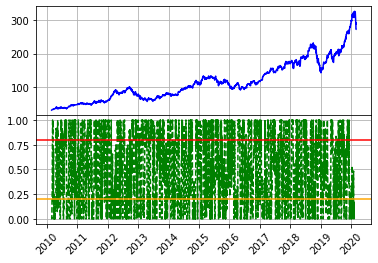

In [19]:
# Plot the close price and StochasticRSI
# Create figure and subplots
fig, (ax1,ax2) = plt.subplots( nrows=2, sharex=True)
# Remove vertical gaps between subplots
plt.subplots_adjust(hspace=.0)
# Add grids
ax1.grid() 
ax2.grid() 
# Plot Close price
ax1.plot(df.index, df['Close'], color='b')
# Plot StochasticRSI
ax2.plot(df.index, df['StochasticRSI'], color='g', linestyle='--')
# Plot over bought as 0.2 and over sold as 0.8
ax2.axhline(0.20, color='orange')
ax2.axhline(0.80, color='r')
# Apply xticks to 45 degress rotation
plt.xticks(rotation=45)